In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Paths
train_dir = r"E:\asd project 2\autism created dataset"  # Train data directory containing emotion subfolders
test_image_path = r"E:\asd project 2\autism created dataset\joy\0009.jpg" # Path to test image

# Hyperparameters
image_size = (224, 224)
batch_size = 32
epochs = 20

# Prepare the dataset
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(5, activation='softmax')(x)  


model = Model(inputs=base_model.input, outputs=x)


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Save the model
model.save('emotion_asd_demo_recognition_model.h5')

def predict_emotion(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None

    # Convert the image from BGR (OpenCV) to RGB (for TensorFlow)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the input size expected by the model
    img = cv2.resize(img, image_size)

    # Expand dimensions to match the model input shape
    img = np.expand_dims(img, axis=0)

    # Normalize the image
    img = img / 255.0  # Rescale image to [0, 1]

    # Perform prediction
    prediction = model.predict(img)

    # Get the class labels (emotions)
    emotion_classes = list(train_generator.class_indices.keys())  # Emotion labels

    # Get the predicted emotion
    predicted_emotion = emotion_classes[np.argmax(prediction)]
    return predicted_emotion


# Example: Predict on a test image
predicted_emotion = predict_emotion(test_image_path)
print(f'The predicted emotion is: {predicted_emotion}')


Found 427 images belonging to 5 classes.
Found 104 images belonging to 5 classes.
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 931ms/step - accuracy: 0.4345 - loss: 2.4572 - val_accuracy: 0.6731 - val_loss: 1.3015
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 531ms/step - accuracy: 0.6461 - loss: 1.1978 - val_accuracy: 0.6635 - val_loss: 1.0177
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 524ms/step - accuracy: 0.7472 - loss: 0.6974 - val_accuracy: 0.6538 - val_loss: 0.9626
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 527ms/step - accuracy: 0.8424 - loss: 0.4925 - val_accuracy: 0.6731 - val_loss: 1.0613
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 530ms/step - accuracy: 0.7985 - loss: 0.4799 - val_accuracy: 0.6154 - val_loss: 0.9832
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 523ms/step - accuracy: 0.9009 - loss: 0.3487 - val_accuracy: 0.6635 - val_loss: 0.9099
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 525ms/step - accuracy: 0.9340 - loss: 0.2558 - val_accuracy: 0.6635 - val_loss: 0.9295
Epoch 8/20
14/14 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted emotion is: joy


In [14]:
import cv2
import numpy as np
import tensorflow as tf

# Path to the saved model and test image
model_path = 'emotion_asd_demo_recognition_model.h5'  # Make sure this path is correct
test_image_path =r"E:\asd project 2\autism created dataset\surprise\1255.jpg"

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Function to predict emotion
def predict_emotion(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None

    # Convert the image from BGR (OpenCV) to RGB (for TensorFlow)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the input size expected by the model
    img = cv2.resize(img, (224, 224))  # Ensure this matches your model's input size

    # Expand dimensions to match the model input shape (batch size of 1)
    img = np.expand_dims(img, axis=0)

    # Normalize the image (same normalization used during training)
    img = img / 255.0  # Rescale image to [0, 1]

    # Perform prediction
    prediction = model.predict(img)

    # Emotion classes based on the training (make sure this matches your dataset)
    emotion_classes = ['anger', 'joy', 'natural', 'sadness', 'surprise']

    # Get the predicted emotion
    predicted_emotion = emotion_classes[np.argmax(prediction)]
    return predicted_emotion

# Predict the emotion on the test image
predicted_emotion = predict_emotion(test_image_path)
if predicted_emotion:
    print(f'The predicted emotion is: {predicted_emotion}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted emotion is: surprise


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


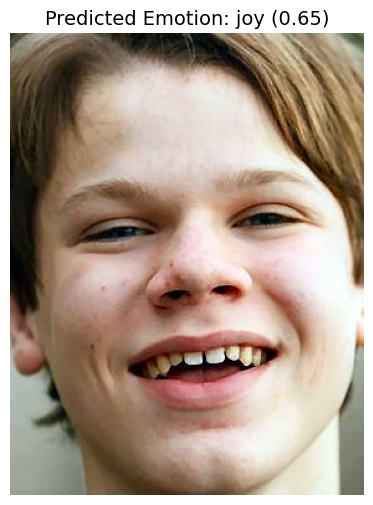

In [15]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Path to the saved model and test image
model_path = 'emotion_asd_demo_recognition_model.h5'
test_image_path =r"E:\asd project 2\autism created dataset\joy\0066.jpg"
model = tf.keras.models.load_model(model_path)

# Emotion classes (ensure this order matches your training labels)
emotion_classes = ['anger', 'joy', 'natural', 'sadness', 'surprise']

# Function to predict emotion
def predict_emotion_and_plot(image_path):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Keep a copy for display (before resizing)
    img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Preprocess for prediction
    img_resized = cv2.resize(img, (224, 224))
    img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_input = np.expand_dims(img_resized, axis=0) / 255.0

    # Predict
    prediction = model.predict(img_input)
    predicted_label = emotion_classes[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Plot the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img_display)
    plt.title(f'Predicted Emotion: {predicted_label} ({confidence:.2f})', fontsize=14)
    plt.axis('off')
    plt.show()

# Run prediction and plot
predict_emotion_and_plot(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


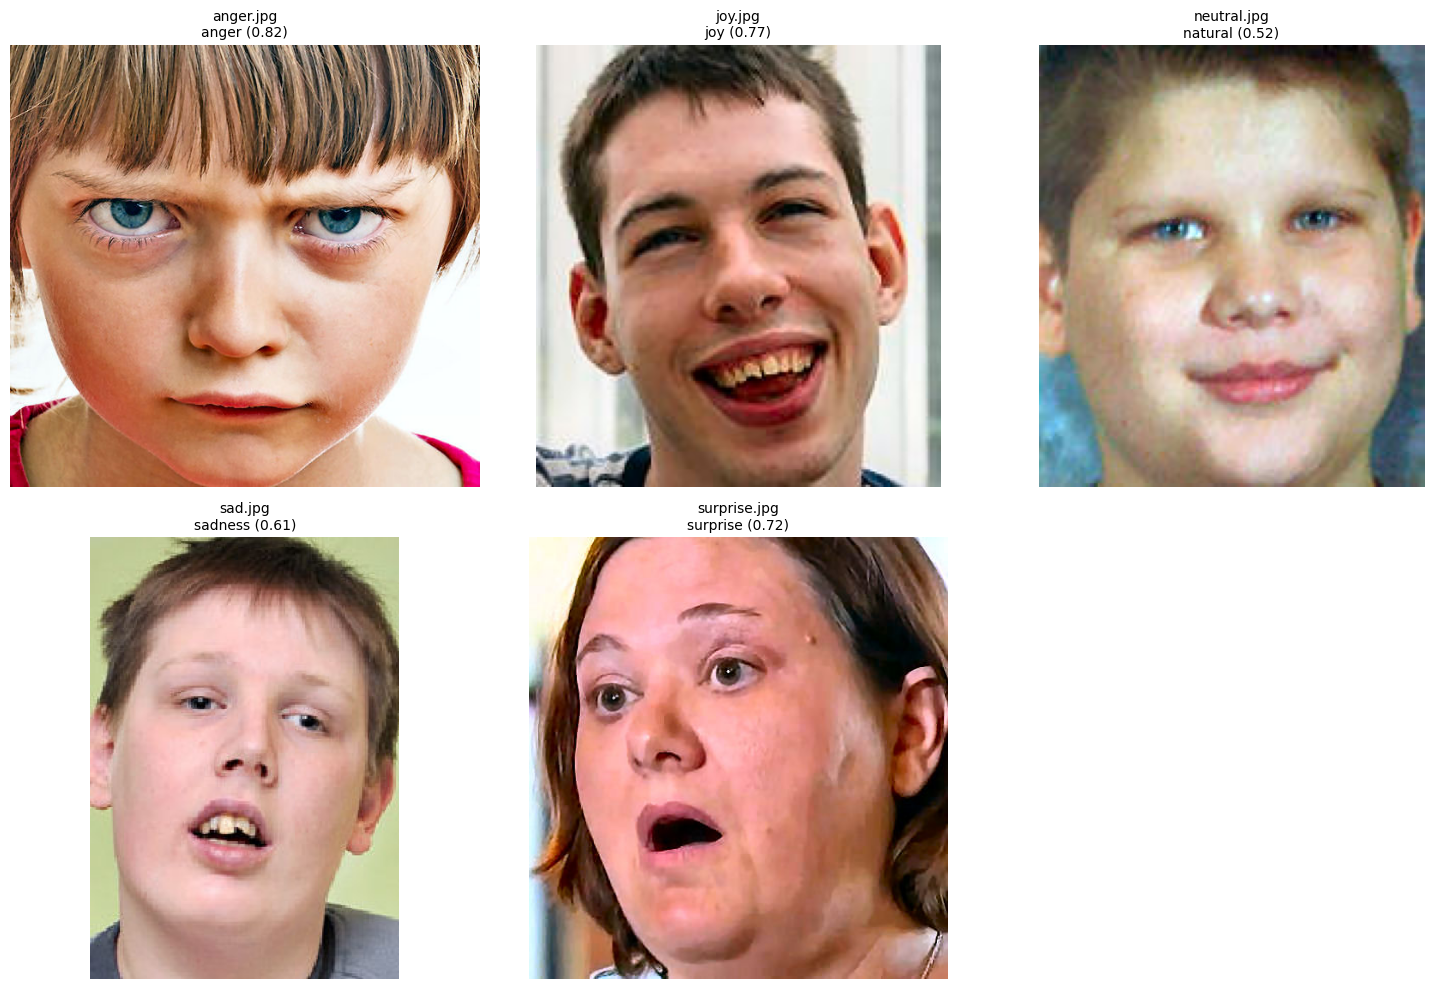

In [11]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Path to the model and test images folder
model_path = 'emotion_asd_demo_recognition_model.h5'
test_images_folder = r"E:\asd project 2\testnimages"

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Emotion classes
emotion_classes = ['anger', 'joy', 'natural', 'sadness', 'surprise']

# Supported file extensions
supported_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
image_files = [os.path.join(test_images_folder, f) for f in os.listdir(test_images_folder)
               if f.lower().endswith(supported_extensions)]

# Set up the number of columns
cols = 3
rows = (len(image_files) + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))

for i, image_path in enumerate(image_files):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading {image_path}")
        continue

    img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (224, 224))
    img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_input = np.expand_dims(img_resized, axis=0) / 255.0

    prediction = model.predict(img_input)
    predicted_label = emotion_classes[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Plot in subplot
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_display)
    plt.title(f'{os.path.basename(image_path)}\n{predicted_label} ({confidence:.2f})', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


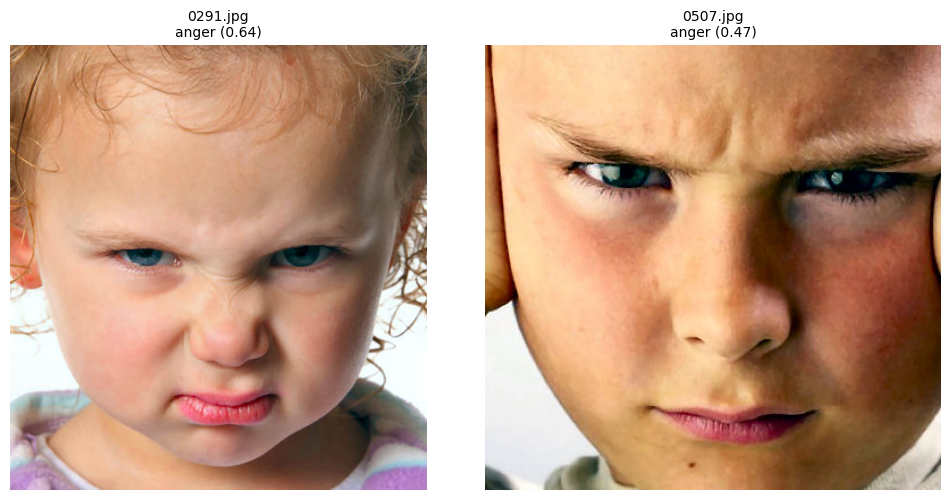

In [16]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Path to the model and test images folder
model_path = 'emotion_asd_demo_recognition_model.h5'
test_images_folder = r"E:\asd project 2\testnimages\ta"

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Emotion classes
emotion_classes = ['anger', 'joy', 'natural', 'sadness', 'surprise']

# Supported file extensions
supported_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
image_files = [os.path.join(test_images_folder, f) for f in os.listdir(test_images_folder)
               if f.lower().endswith(supported_extensions)]

# Set up the number of columns
cols = 3
rows = (len(image_files) + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))

for i, image_path in enumerate(image_files):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading {image_path}")
        continue

    img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (224, 224))
    img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_input = np.expand_dims(img_resized, axis=0) / 255.0

    prediction = model.predict(img_input)
    predicted_label = emotion_classes[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Plot in subplot
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_display)
    plt.title(f'{os.path.basename(image_path)}\n{predicted_label} ({confidence:.2f})', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()
